# Script contents:
## 1. Importing libraries
## 2. Histogram
## 3. Bar chart
## 3. Sampling of data 
## 4. Line chart
## 5. Scatterplot

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
# defining path
path=r'C:\Users\akul_\OneDrive\Documents\Tarishi\CF Data analysis bootcamp\Achievement 4-Python\Instacart Basket Analysis'

In [3]:
# Importing dataframe
df_merged_final=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared data', 'orders_customers_all.pkl'))

# Histogram

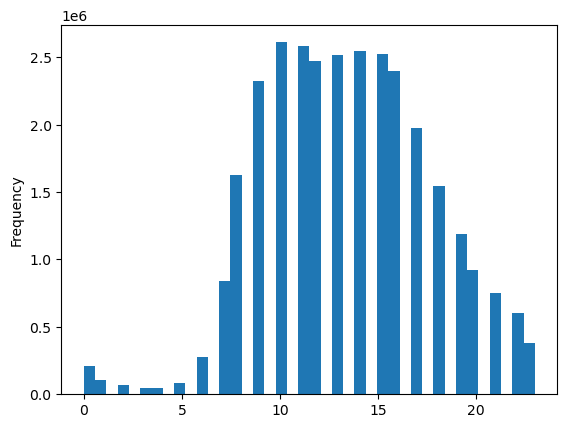

In [4]:
Order_hist=df_merged_final['order_hour_of_day'].plot.hist(bins=40)

## The histogram shows that the maximum no of orders are placed between 9-15, and as the day progresses, the orders decrease. This is confirmed with the frequency count below


In [5]:
## cross check the histogram
df_merged_final['order_hour_of_day'].value_counts()

order_hour_of_day
10    2609878
11    2585887
14    2543388
15    2519570
13    2517264
12    2474099
16    2398341
9     2320463
17    1973941
8     1623690
18    1543892
19    1189761
20     921249
7      841413
21     752663
22     598927
23     378678
6      275016
0      206659
1      109281
5       83273
2       65188
4       49418
3       47802
Name: count, dtype: int64

In [6]:
## export the histogram
Order_hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_orders.png'))

# Bar chart

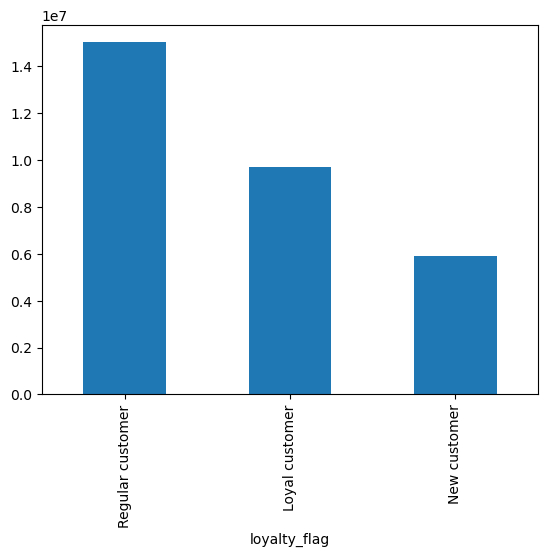

In [7]:
bar=df_merged_final['loyalty_flag'].value_counts().plot.bar()

In [8]:
## saving the bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_bar.png'))

# Line chart

## Sampling of data

In [9]:
# create a list with boolean values np.random.seed(6)
sample=np.random.rand(len(df_merged_final))<=0.7


In [10]:
# store 70% of data in the dataframe large
large=df_merged_final[sample]

In [11]:
# store 30% of sample in dataframe small
small=df_merged_final[~sample]

In [12]:
## cross check the sampling
len(df_merged_final)

30629741

In [13]:
len(large)+len(small)

30629741

In [14]:
## creating a subset further with only the two needed columns- prices and order_hour_of_day
df=small[['prices','order_hour_of_day']]

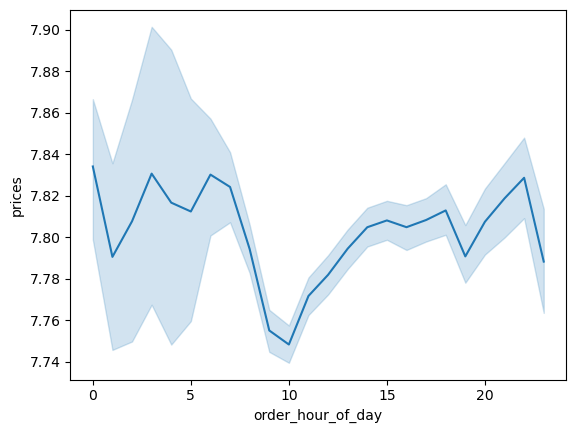

In [15]:
## creating a line chart
orders_line=sns.lineplot(data=df,x='order_hour_of_day',y='prices')

## From the previous line chart, we know the busiest hour is between 10-15, this line chart shows that the prices of orders are lowest during this time. 

In [16]:
## saving the line chart as image
orders_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_hourly_orders.png'))

## line chart- age and no of dependents

In [17]:
df_merged_final.head()

,order_id,user_id,no_of_orders,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,order_frequency,First Name,Last name,Gender,State,Age,n_dependants,fam_status,income,merge_flag
0,2539329,1,1,2,8,NaN,196,1,0,both,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
1,2539329,1,1,2,8,NaN,14084,2,0,both,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
2,2539329,1,1,2,8,NaN,12427,3,0,both,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
3,2539329,1,1,2,8,NaN,26088,4,0,both,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
4,2539329,1,1,2,8,NaN,26405,5,0,both,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both


In [18]:
## creating a subset with two columns-age and dependants
df_2=small[['Age','n_dependants']]

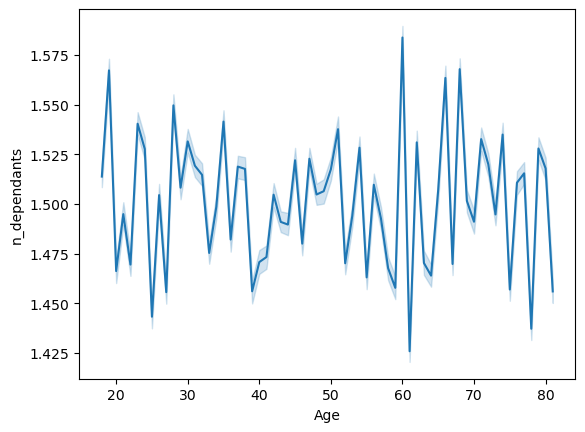

In [19]:
## creating line chart
age_line=sns.lineplot(data=df_2,x='Age',y='n_dependants')

## there is no coherent relationship between age and no of dependents


In [20]:
## save line chart as image
age_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_line.png'))

# Scatterplot

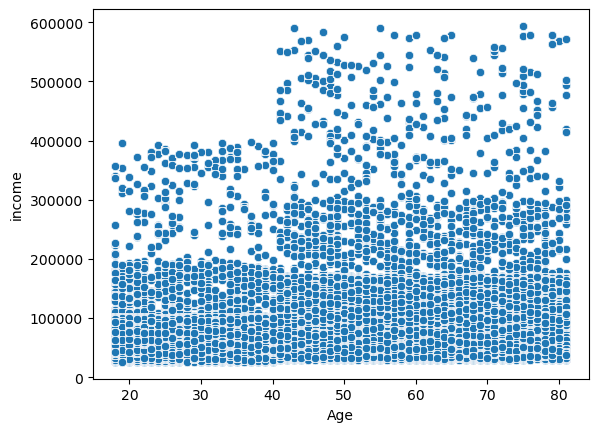

In [21]:
age_splot=sns.scatterplot(x='Age', y='income',data=df_merged_final)

## The basic income level stays the same for all age groups. However,the higher income falls in the middle age group between 40 and 60 years old. 

In [22]:
age_splot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_scatterplot.png'))

In [23]:
# Export the dataframe
df_merged_final.to_pickle(os.path.join(path, '02 Data', 'Prepared data', 'orders_customers_all.pkl'))